In [1]:
# Titanic Data Analysis Project
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Make plots look better
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [6]:
# 1. Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\.ipynb_checkpoints\Titanic-Dataset.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 2. Basic dataset info
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Shape: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

In [11]:
# 3. Data Cleaning
# Fill missing Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())


In [12]:
# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [16]:
# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)


KeyError: "['Cabin'] not found in axis"

In [17]:
# Check again for missing values
print("\nMissing values after cleaning:\n", df.isnull().sum())



Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
# 4. Summary statistics
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


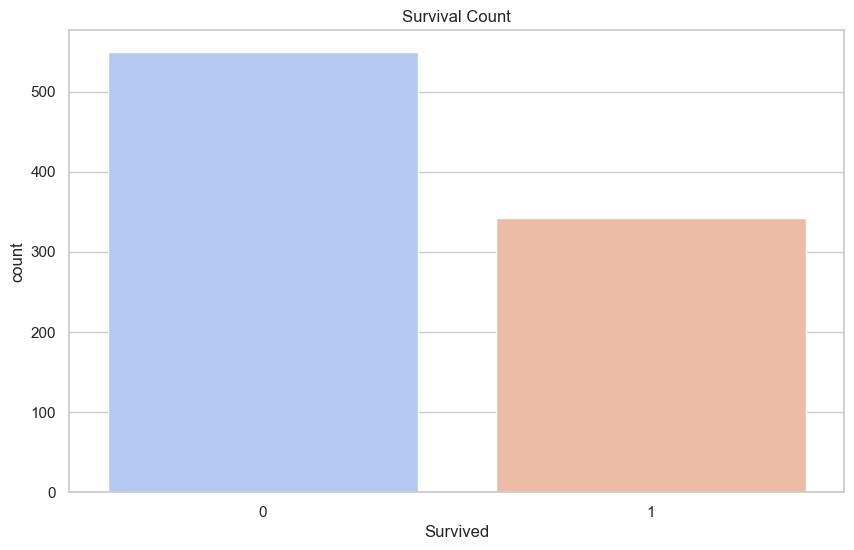

In [31]:
# 5. Exploratory Data Analysis (EDA)

## Survival count
sns.countplot(x="Survived", data=df, hue="Survived", palette="coolwarm", legend=False)
plt.title("Survival Count")
plt.show()
plt.savefig("survival count.png")   # saves to current folder
plt.close()  # closes figure so the next plot is fresh

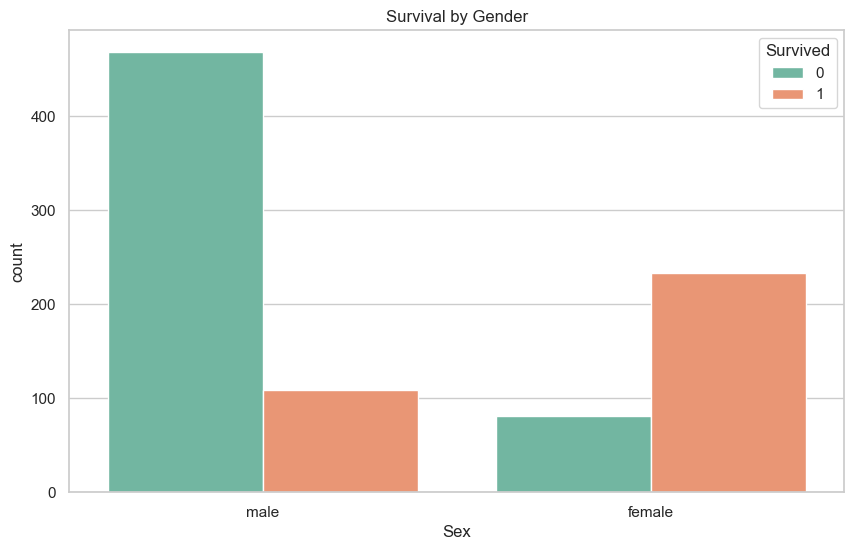

In [33]:
## Survival by Gender
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Gender")
plt.show()
plt.savefig("Survival by Gender.png")   # saves to current folder
plt.close()  # closes figure so the next plot is fresh

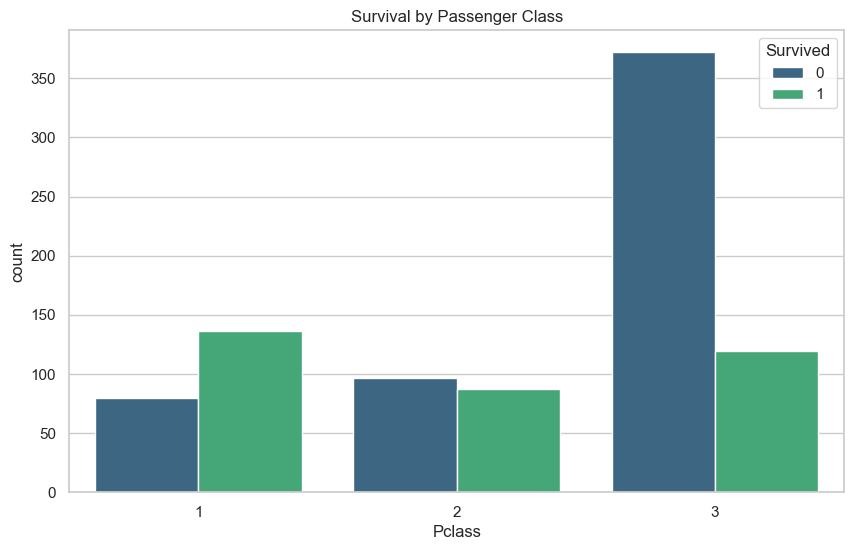

In [22]:
## Survival by Passenger Class
sns.countplot(x="Pclass", hue="Survived", data=df, palette="viridis")
plt.title("Survival by Passenger Class")
plt.show()

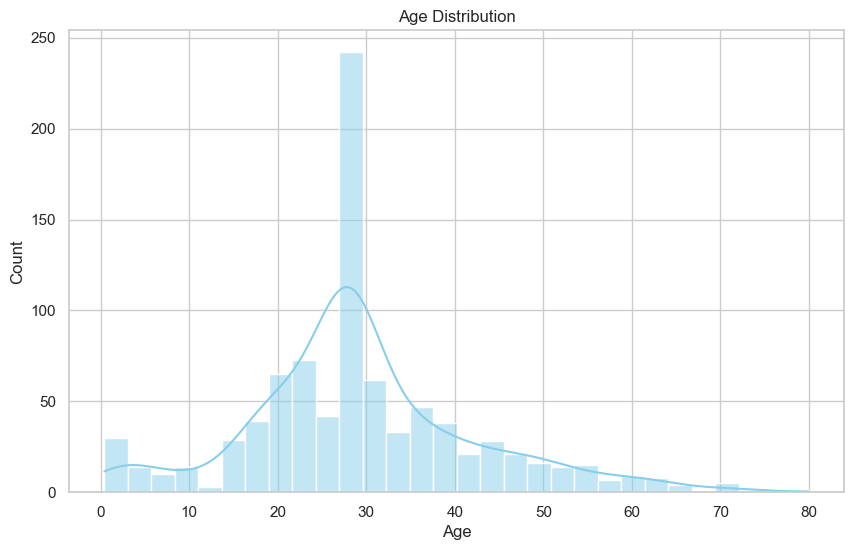

In [23]:
## Age distribution
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

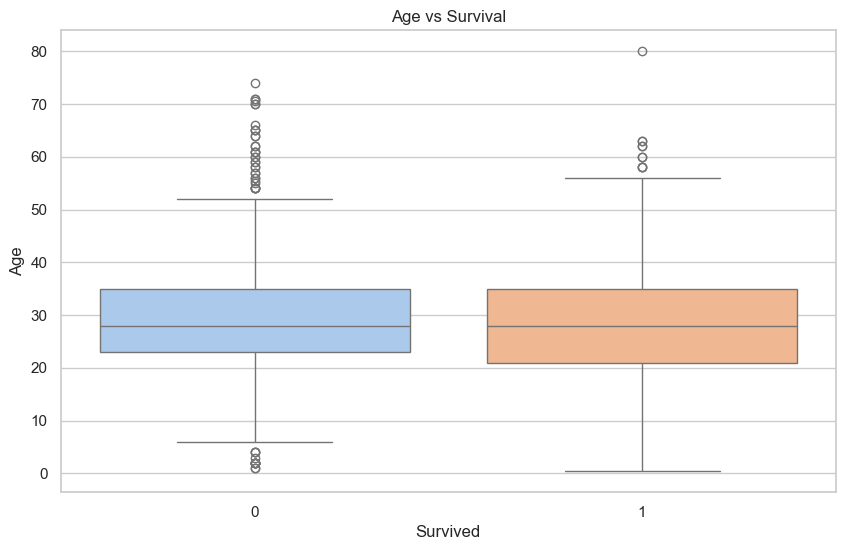

In [25]:
## Age vs Survival
sns.boxplot(x="Survived", y="Age", data=df, hue="Survived", palette="pastel", legend=False)
plt.title("Age vs Survival")
plt.show()

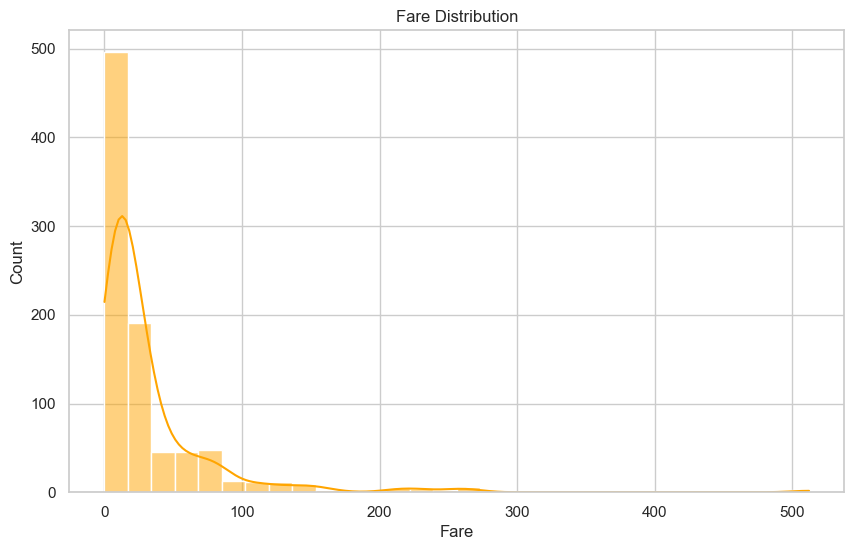

In [26]:
## Fare distribution
sns.histplot(df["Fare"], bins=30, kde=True, color="orange")
plt.title("Fare Distribution")
plt.show()

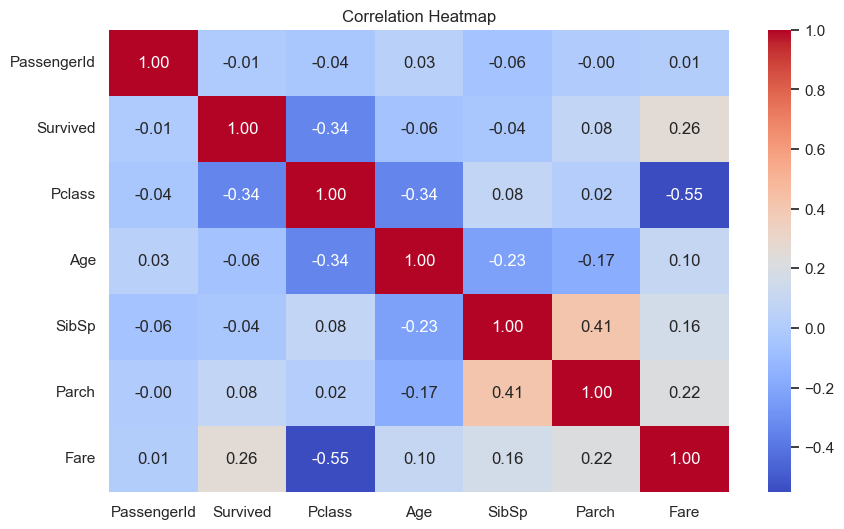

In [27]:
## Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# 6. Key Insights
# Survival rate by class and gender
survival_summary = df.groupby(["Pclass", "Sex"])["Survived"].mean().reset_index()
print("\nSurvival Rate by Class and Gender:\n", survival_summary)



Survival Rate by Class and Gender:
    Pclass     Sex  Survived
0       1  female  0.968085
1       1    male  0.368852
2       2  female  0.921053
3       2    male  0.157407
4       3  female  0.500000
5       3    male  0.135447


In [29]:
# 7. Save cleaned data
df.to_csv("titanic_cleaned.csv", index=False)
print("\nCleaned dataset saved as titanic_cleaned.csv")


Cleaned dataset saved as titanic_cleaned.csv


In [30]:
plt.savefig("survival_count.png")   # saves to current folder
plt.close()  # closes figure so the next plot is fresh

In [ ]:
import os
os.getcwd()
